In [36]:
import matplotlib.pyplot as plt
from IPython.display import Image
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

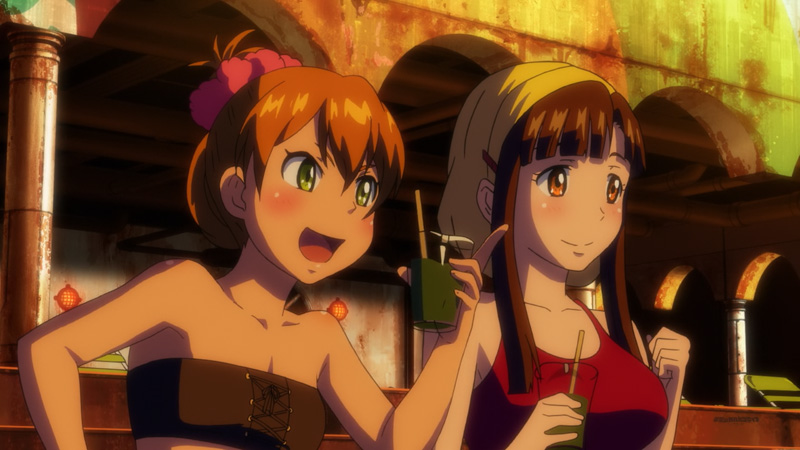

In [2]:
Image("suiseiova.jpg")

In [3]:
img = mpimg.imread("suiseiova.jpg")

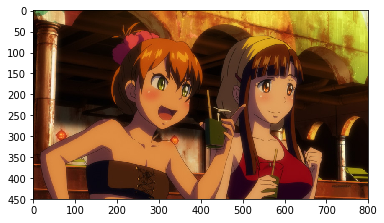

In [4]:
plt.imshow(img)

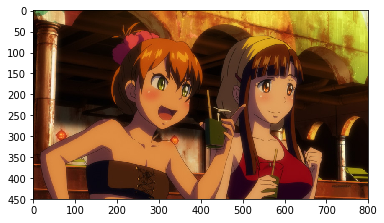

In [39]:
plt.imshow(img, cmap = 'gray')

In [41]:
img.shape

(450, 800, 3)

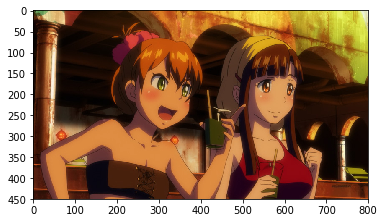

In [38]:
imgray = np.zeros((img.shape[0], img.shape[1], img.shape[2]))
imgray[:,:,0] = (1/255)*img[:,:,0]
imgray[:,:,1] = (1/255)*img[:,:,1]
imgray[:,:,2] = (1/255)*img[:,:,2]
plt.imshow(imgray)

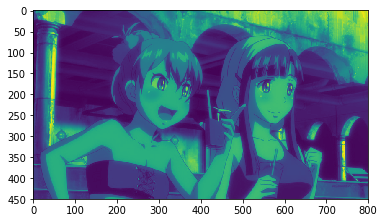

In [68]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
     
gray = rgb2gray(img)    
#plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.imshow(gray)
plt.show()

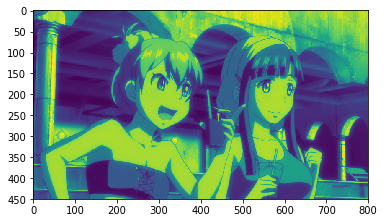

In [9]:
lum_img1 = img[:, :, 0]
plt.imshow(lum_img1)

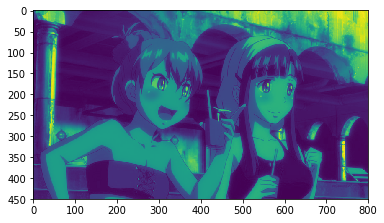

In [10]:
lum_img2 = img[:, :, 1]
plt.imshow(lum_img2)

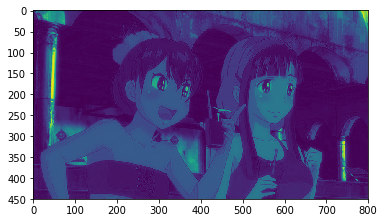

In [11]:
lum_img3 = img[:, :, 2]
plt.imshow(lum_img3)

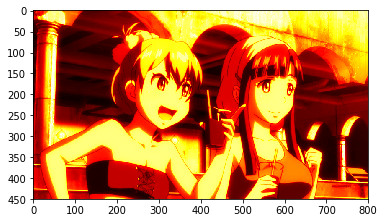

In [17]:
plt.imshow(lum_img1, cmap="hot")

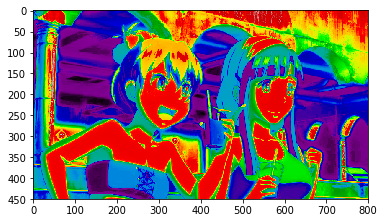

In [19]:
imgplot = plt.imshow(lum_img1)
imgplot.set_cmap('nipy_spectral')

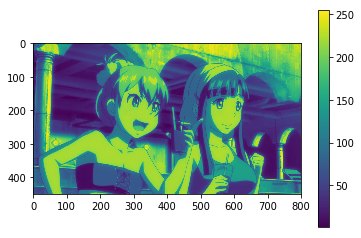

In [20]:
imgplot = plt.imshow(lum_img1)
plt.colorbar()

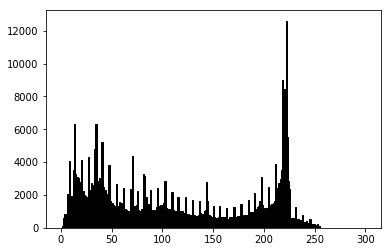

In [26]:
plt.hist(lum_img1.ravel(), bins=256, range=(0.0, 300.0), fc='k', ec='k')
plt.show()

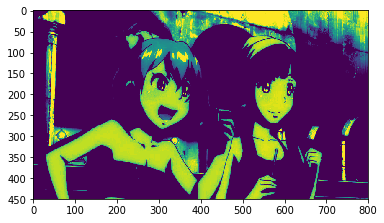

In [29]:
plt.imshow(lum_img1, clim=(165.0, 228.0))

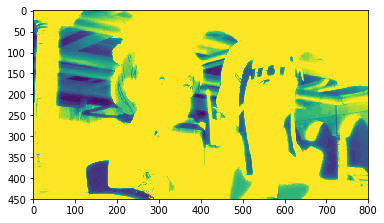

In [30]:
plt.imshow(lum_img1, clim=(1.0, 50.0))

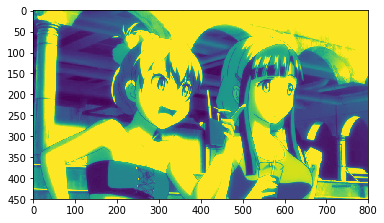

In [32]:
plt.imshow(lum_img1, clim=(1.0, 155.0))

## PCA Part

In [42]:
X = img
C = np.cov(X)
np.linalg.matrix_rank(C)

ValueError: m has more than 2 dimensions

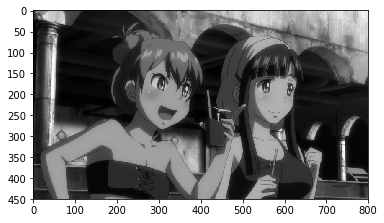

In [46]:
gray = rgb2gray(img)    
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

In [47]:
gray.shape

(450, 800)

In [48]:
X = gray
C = np.cov(X)
np.linalg.matrix_rank(C)

450

$C = L P L^T$, where L is eigenvectors matrix which is orthonormal, P is diagonal eigenvalues matrix

In [49]:
P, L = np.linalg.eigh(C) # Eigendecomposition of C(Covariance matrix)

In [50]:
np.linalg.matrix_rank(L), np.linalg.matrix_rank(P)  # P is an eigenvalues array! 

(450, 1)

In [51]:
P = P[::-1]
L = L[:,::-1]
#  np.linalg.eigh(C) this gives the ascending order, we transform it into descending order

In [52]:
np.allclose(L.dot(np.diag(P)).dot(L.T), C)# Decomposition is successful

True

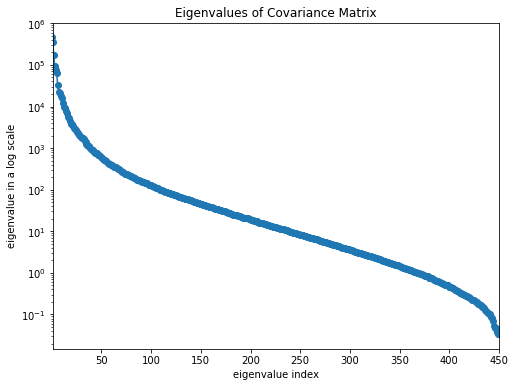

In [53]:
plt.figure(figsize = (8,6))
plt.semilogy(P, '-o')
plt.xlim([1, P.shape[0]])
plt.xlabel('eigenvalue index')
plt.ylabel('eigenvalue in a log scale')
plt.title('Eigenvalues of Covariance Matrix');
plt.show()

In [54]:
V = L.T.dot(X) # apply projection onto eigenbases, then get the coefficients

In [55]:
Re_X = L.dot(V) # Combining the eigenvectors with the coefficients

In [56]:
np.allclose(Re_X, X)# Full rank approximation

True

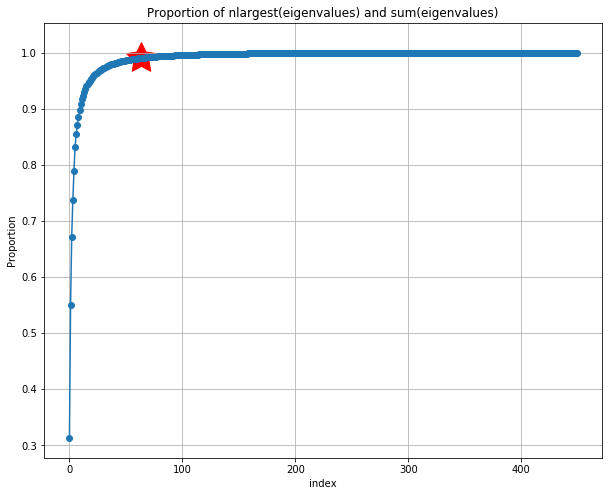

In [67]:
normed_cumsum = (P.cumsum()/P.sum())

plt.figure(figsize = (10,8))
plt.plot(normed_cumsum, '-o')
plt.scatter(len(np.where(normed_cumsum <= 0.99)[0]), normed_cumsum[len(np.where(normed_cumsum <= 0.99)[0])], marker=(5,1,0),color='r',s=1000)
plt.title('Proportion of nlargest(eigenvalues) and sum(eigenvalues)')
plt.xlabel('index')
plt.ylabel('Proportion');
plt.grid(True)
plt.show()

In [58]:
len(np.where(normed_cumsum <= 0.99)[0])# To obtain target compression percentage, what k(approx. rank) sholud be

63

In [60]:
normed_cumsum[63]

0.99023477146772165

In [61]:
normed_cumsum[normed_cumsum <= 0.99]

array([ 0.31288396,  0.55019462,  0.67170435,  0.7365195 ,  0.78924159,
        0.83242388,  0.85507991,  0.87056352,  0.88478457,  0.89720506,
        0.90817378,  0.91650397,  0.92333052,  0.9296552 ,  0.93495328,
        0.93967874,  0.94356098,  0.94720166,  0.95026417,  0.95292905,
        0.95548346,  0.95781828,  0.95988132,  0.96185429,  0.96373894,
        0.96541103,  0.9669567 ,  0.96835292,  0.96969257,  0.9709877 ,
        0.9721959 ,  0.97336738,  0.97447172,  0.975502  ,  0.97644609,
        0.97730519,  0.97812872,  0.97891715,  0.9796674 ,  0.98036213,
        0.98102412,  0.98165747,  0.98226462,  0.98282649,  0.98336   ,
        0.98387731,  0.98439098,  0.98487035,  0.98533682,  0.98577995,
        0.98619604,  0.98659198,  0.98697249,  0.98733388,  0.98769286,
        0.98801926,  0.98832991,  0.98862744,  0.98890933,  0.98918865,
        0.98946481,  0.98973051,  0.98998976])

In [62]:
len(normed_cumsum[normed_cumsum <= 0.99])# That is identical above result. It is neater.

63

In [63]:
for k in range(len(P)):
    ratio = sum(P[0:k+1])/ sum(P)
    if  ratio >= 0.99:
        break
print("Pick the largest:", k+1)

Pick the largest: 64




$X\approx L(:,0:k)*L(:,0:k)* X$

$X\approx L(:,0:k)*(L(:,0:k)* X)$, k-rank approximation

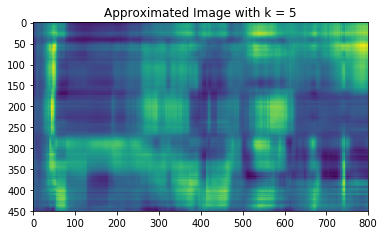

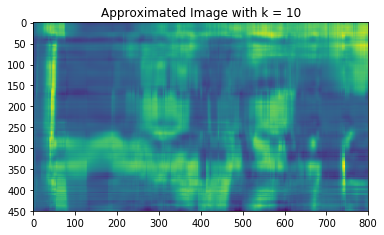

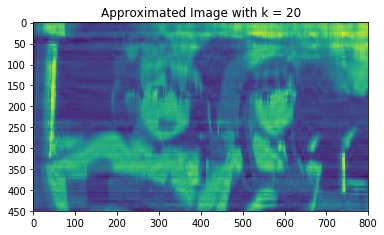

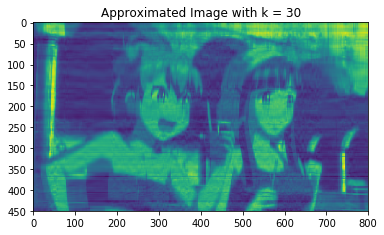

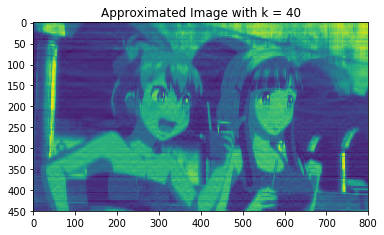

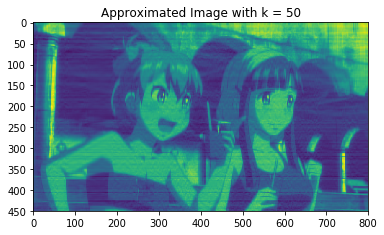

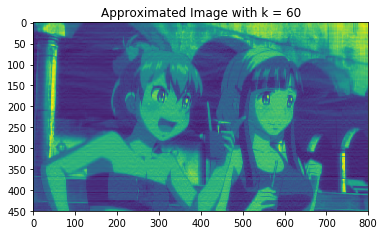

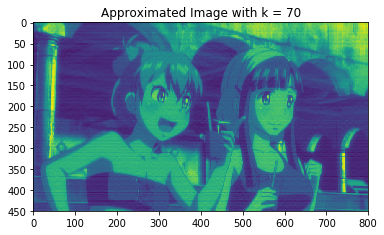

In [77]:
k_list = [5, 10, 20, 30, 40, 50, 60, 70]
for i in range(len(k_list)):
    
    X_tilda_k = L[:,0:k_list[i]].dot(L[:,0:k_list[i]].T.dot(X))
    plt.figure(figsize = (6,6))
    
    plt.imshow(X_tilda_k)
    plt.title('Approximated Image with k ='+' '+str(k_list[i]));
    plt.show()


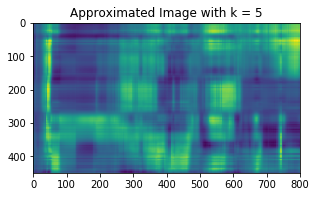

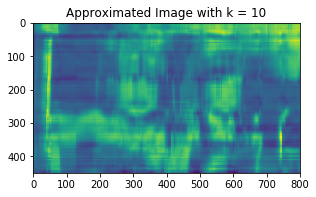

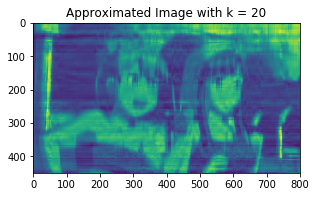

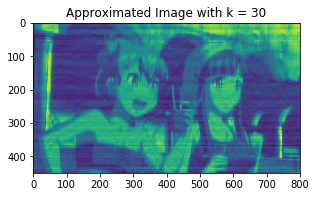

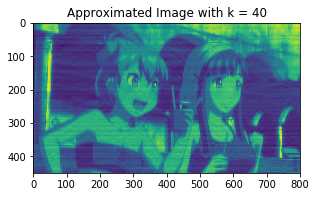

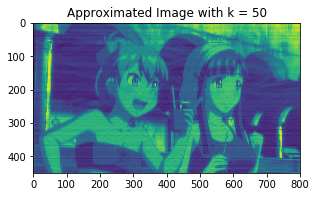

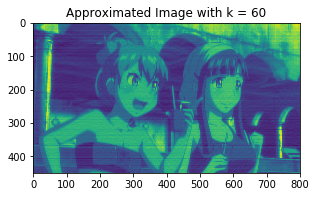

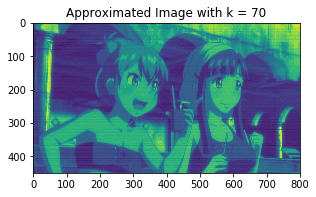

In [76]:
k_list = [5, 10, 20, 30, 40, 50, 60, 70]
for i in range(len(k_list)):
    X_tilda_k = L[:,0:k_list[i]].dot(L[:,0:k_list[i]].T.dot(X)) 
    
    fig = plt.figure(0, (len(k_list) + 14, len(k_list) + 10))
    fig.add_subplot(2,len(k_list)/2,i+1)
    
    plt.imshow(X_tilda_k)
    plt.title('Approximated Image with k ='+' '+str(k_list[i]));
    plt.show()